In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [23]:
df = pd.read_csv('../data/rfm_data.csv')
df.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,1,77183.60,1,1,Hibernating
1,12347.0,2,182,4310.00,5,5,Champions
2,12348.0,75,31,1797.24,2,3,At-Risk
3,12349.0,19,73,1757.55,4,4,Loyal Customers
4,12350.0,310,17,334.40,1,2,Hibernating


In [24]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df[['Recency', 'Frequency', 'MonetaryValue']])

In [25]:
print(rfm_scaled[:5])  # Display the first 5 rows of the scaled data

[[ 2.33457414 -0.39703458  8.36301037]
 [-0.90534032  0.4056939   0.2516989 ]
 [-0.17535959 -0.26398566 -0.02798783]
 [-0.73534481 -0.07771717 -0.03240559]
 [ 2.17457836 -0.32607515 -0.19081155]]


In [26]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(rfm_scaled)
df['Cluster'] = kmeans.labels_

In [27]:
df.head()  # Display the first few rows of the DataFrame with clusters

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,Cluster
0,12346.0,326,1,77183.60,1,1,Hibernating,1
1,12347.0,2,182,4310.00,5,5,Champions,0
2,12348.0,75,31,1797.24,2,3,At-Risk,0
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0
4,12350.0,310,17,334.40,1,2,Hibernating,2


In [28]:
new_rfm = df[["Recency", "Frequency", "MonetaryValue", "rfm_segment"]]

In [29]:
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

,Recency,Frequency,MonetaryValue,rfm_segment
0,326,1,77183.60,Hibernating
1,2,182,4310.00,Champions
2,75,31,1797.24,At-Risk
3,19,73,1757.55,Loyal Customers
4,310,17,334.40,Hibernating


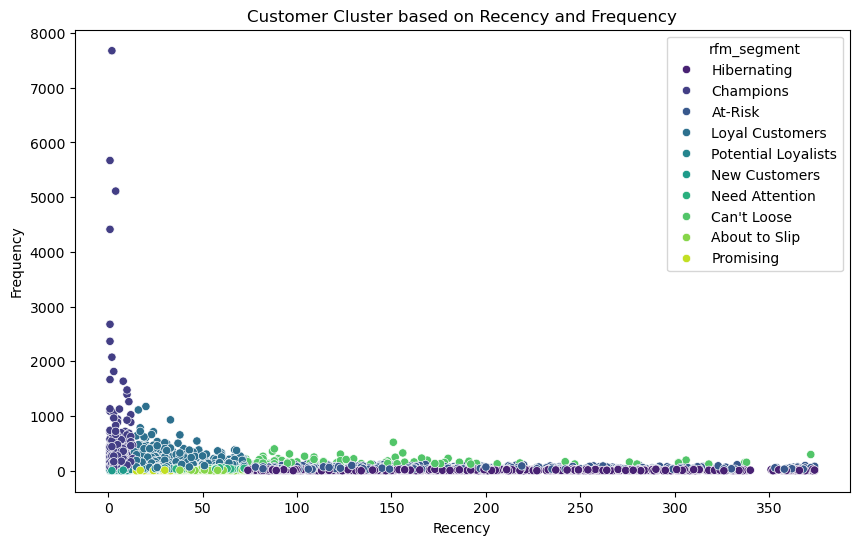

In [30]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'rfm_segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

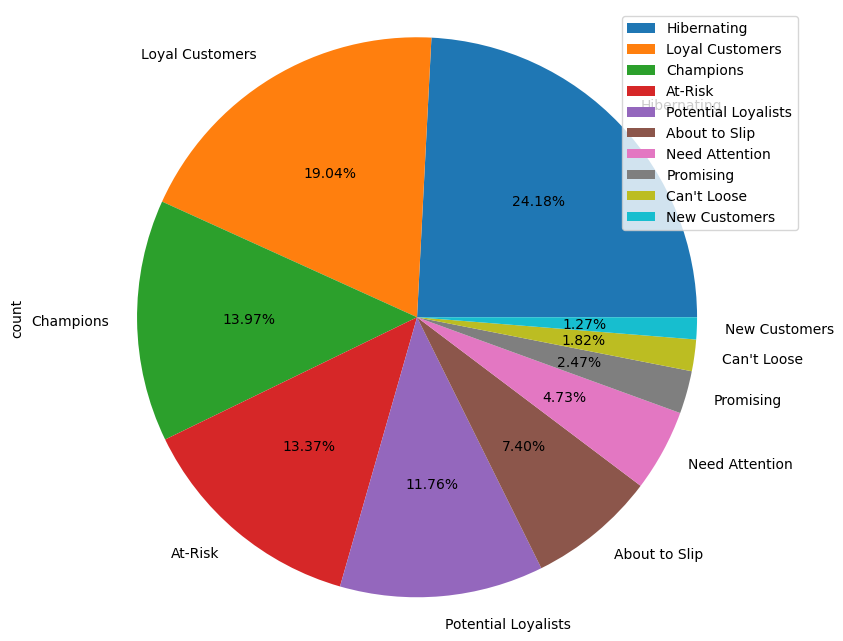

In [31]:
segments = new_rfm['rfm_segment'].value_counts()

plt.figure(figsize = (10, 8), )

segments.plot(
    kind = 'pie',
    color=segments.index,

    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()

In [32]:
new_rfm[["rfm_segment","Recency", "Frequency", "MonetaryValue"]].groupby("rfm_segment").agg(["mean", "count","sum"])

Recency                 Frequency                \
                           mean count     sum        mean count     sum   
rfm_segment                                                               
About to Slip         53.838006   321   17282   15.616822   321    5013   
At-Risk              166.693103   580   96682   55.641379   580   32272   
Can't Loose          147.101266    79   11621  179.544304    79   14184   
Champions              5.920792   606    3588  285.031353   606  172729   
Hibernating          211.665396  1049  222037   13.360343  1049   14015   
Loyal Customers       34.046005   826   28122  154.351090   826  127494   
Need Attention        52.853659   205   10835   40.775610   205    8359   
New Customers          6.709091    55     369    7.345455    55     404   
Potential Loyalists   16.511765   510    8421   34.221569   510   17453   
Promising             23.046729   107    2466    7.186916   107     769   

                    MonetaryValue                     
                             mean count          sum  
rfm_segment                                           
About to Slip          474.704611   321   152380.180  
At-Risk                987.054397   580   572491.550  
Can't Loose           2399.206848    79   189537.341  
Champions             6946.211205   606  4209403.990  
Hibernating            528.451642  1049   554345.772  
Loyal Customers       2822.989419   826  2331789.260  
Need Attention         833.059073   205   170777.110  
New Customers         3742.133091    55   205817.320  
Potential Loyalists    890.921375   510   454369.901  
Promising              432.677290   107    46296.470

In [33]:
features = df[['Recency', 'Frequency', 'MonetaryValue']]
df['FutureSpending'] = np.random.rand(len(df)) * 3000

In [34]:
df.head()  

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,Cluster,FutureSpending
0,12346.0,326,1,77183.60,1,1,Hibernating,1,1447.504469
1,12347.0,2,182,4310.00,5,5,Champions,0,825.571608
2,12348.0,75,31,1797.24,2,3,At-Risk,0,1671.781978
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0,1996.351882
4,12350.0,310,17,334.40,1,2,Hibernating,2,1070.595224


In [35]:
X = features
y = df['FutureSpending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 726946.2611996647
R^2 Score: 0.0002718005295296866


In [38]:
results_df = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': pred})
results_df.head()

,Future Spending,Predicted Spending
3975,771.029687,1504.571744
1448,2136.818542,1508.597766
2662,1005.389827,1504.696086
17,735.817971,1504.817422
1634,445.142420,1506.421985


In [39]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [40]:
dtr_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, dtr_pred)
r2 = r2_score(y_test, dtr_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1583175.0083425166
R^2 Score: -1.177251311431108


In [41]:
results_df = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': dtr_pred})
results_df.head()

,Future Spending,Predicted Spending
3975,771.029687,16.190413
1448,2136.818542,2585.826983
2662,1005.389827,2592.476789
17,735.817971,2108.299310
1634,445.142420,2968.564475


In [42]:
new_customer_rfm = np.array([[10, 5, 300]])
pred_spending = lin_reg.predict(new_customer_rfm)

print(f"Predicted Future Spending: {pred_spending[0]}")

Predicted Future Spending: 1503.5297902732118


/opt/anaconda3/envs/dpenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
